In [ ]:
#1001
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

path_automatic_readings = 'C:\\Users\\Aaron\\Documents\\pubblications\\paper1_anomalies\\data\\holfuy\\2021\\automatic_reading\\1001\\1001_mT_Hist_2021-08-01_08-18_2021-09-22_12-03.csv'
path_manual_readings = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\1001_manual\\1001_manual.xlsx'
#path_automatic_readings_mS = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\automatic_reading\\1006_mT_mS_dt2.xlsx'

auto_readings = pd.read_csv(path_automatic_readings)
manual_readings = pd.read_excel(path_manual_readings)
#auto_readings_mS = pd.read_excel(path_automatic_readings_mS)
#final = pd.read_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_abl_sum.csv')

#auto_readings_mS['rate'] = auto_readings_mS['rate'].rolling().mean()

start_year = int(path_automatic_readings.split('\\')[-1].split('_')[3].split('-')[0])
start_month = int(path_automatic_readings.split('\\')[-1].split('_')[3].split('-')[1])
start_day = int(path_automatic_readings.split('\\')[-1].split('_')[3].split('-')[2])
start_hour = int(path_automatic_readings.split('\\')[-1].split('_')[4].split('-')[0])
start_minute = int(path_automatic_readings.split('\\')[-1].split('_')[4].split('-')[1])

end_year = int(path_automatic_readings.split('\\')[-1].split('_')[5].split('-')[0])
end_month = int(path_automatic_readings.split('\\')[-1].split('_')[5].split('-')[1])
end_day = int(path_automatic_readings.split('\\')[-1].split('_')[5].split('-')[2])
end_hour = int(path_automatic_readings.split('\\')[-1].split('_')[6].split('-')[0])
end_minute = int(path_automatic_readings.split('\\')[-1].split('_')[6].split('-')[1].split('.')[0])


start_date = pd.Timestamp(year=start_year, month=start_month, day=start_day, hour=start_hour, minute=start_minute)
end_date = pd.Timestamp(year=end_year, month=end_month, day=end_day, hour=end_hour, minute=end_minute)

print(start_date, end_date)

initial_date_str = manual_readings['initial_date'].tolist()
final_date_str = manual_readings['final_date'].tolist()
manual_disp = manual_readings['displacements [cm ice]'].tolist()

# displacements mT_Hist
time_delta = auto_readings['time[h]'].tolist()
time = []
for t in time_delta:
    time.append(start_date + pd.Timedelta(hours=t))

auto_readings = pd.DataFrame({'date': time, 'dh': auto_readings['displacement rate [cm]'].tolist()}) #data=[[time,auto_readings['displacement rate [cm]'].tolist()]], columns=['time', 'displ'])

daily_displ = auto_readings.groupby(pd.Grouper(key='date', freq='1d')).sum().reset_index()

# displacements mT_mS
#time_delta_mS = auto_readings_mS['time'].tolist()
#time = []
#for t in time_delta_mS:
#    time.append(start_date + pd.Timedelta(hours=t))

#print(len(time), len(auto_readings_mS['rate'].tolist()))
#auto_readings_mS = pd.DataFrame({'date': time, 'dh': auto_readings_mS['rate'].tolist()}) #data=[[time,auto_readings['displacement rate [cm]'].tolist()]], columns=['time', 'displ'])

#daily_displ_mS = auto_readings_mS.groupby(pd.Grouper(key='date', freq='1d')).sum().reset_index()

initial_date = []
final_date = []
periodic_sum = []
periodic_sum_mS = []
periodic_sum_fin = []

for idx, (init,fin) in enumerate(zip(initial_date_str, final_date_str)):
    temp_sum = 0
    temp_sum_mS = 0
    temp_sum_fin = 0
    print('init', init)
    y1 = int(init.split('.')[2])
    m1 = int(init.split('.')[1])
    d1 = int(init.split('.')[0])
    y2 = int(fin.split('.')[2])
    m2 = int(fin.split('.')[1])
    d2 = int(fin.split('.')[0])

    initial_date.append(pd.Timestamp(year=y1, month=m1, day=d1))
    final_date.append(pd.Timestamp(year=y2, month=m2, day=d2))

    interval = pd.Interval(pd.Timestamp(year=y1, month=m1, day=d1), pd.Timestamp(year=y2, month=m2, day=d2))
    print(interval)

    #print(init, fin)
    for date, disp in zip(daily_displ['date'].tolist(), daily_displ['dh'].tolist()):
        if date in interval:
            temp_sum += disp
        #if init <= date < fin:
        #    temp_sum += disp
    periodic_sum.append(temp_sum)

    #for date_mS, disp_mS in zip(daily_displ_mS['date'].tolist(), daily_displ_mS['dh'].tolist()):
    #    if date_mS in interval:
    #        temp_sum_mS += disp_mS
    #periodic_sum_mS.append(temp_sum_mS)

    #for date_fin, disp_fin in zip(final['date'].tolist(), final['dh'].tolist()):
    #    date_fin = pd.Timestamp(date_fin)
    #    if date_fin in interval:
    #        temp_sum_fin += disp_fin
    #periodic_sum_fin.append(temp_sum_fin)

#mean_auto = np.divide((daily_displ['dh'].div(100) + daily_displ_mS['dh']), 2)

#print(daily_displ['dh'].iloc[1])

print(periodic_sum)
print(manual_disp)
plt.scatter(final_date, np.divide(periodic_sum, 100), label='automatic mT')
#plt.scatter(final_date, periodic_sum_mS, label='automatic mS')
#plt.scatter(final_date, periodic_sum_fin, label='automatic')

#plt.scatter(final_date, manual_disp, label='manual')
plt.errorbar(final_date, np.divide(manual_disp,100), color='orange', yerr = 0.04, fmt='o', ecolor='black', label='manual')
plt.legend()
plt.ylim([0,0.5])
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1005_weekly_comp.png')
plt.show()


# plot cumulative displacements
plt.plot(daily_displ['date'].tolist(), np.cumsum(daily_displ['dh'].tolist()), label='automatic mT')
#plt.plot(daily_displ_mS['date'].tolist(), np.cumsum(daily_displ_mS['dh'].tolist()), label='automatic mS')
#plt.plot(daily_displ_mS['date'].tolist(), np.cumsum(mean_auto), label='automatic mean')

#plt.plot(initial_date, np.cumsum(periodic_sum))
plt.scatter(final_date, np.cumsum(manual_disp), color='orange', label='manual')
plt.legend()
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1005_cumulative_comp.png')
plt.show()
daily_displ['dh'] = daily_displ['dh'].div(100)
#daily_displ.to_csv('C:\\Users\\Aaron\\Documents\\pubblications\\paper1_anomalies\\data\\holfuy\\2021\\final_readings_ablation\\1001_abl_sum_final.csv', index=False)  # , columns=column_names)


plt.plot(daily_displ['date'].tolist(), daily_displ['dh'].tolist(), marker='.', label='automatic mT')
#plt.plot(daily_displ_mS['date'].tolist(), daily_displ_mS['dh'].tolist(), label='automatic mS')
#plt.plot(daily_displ['date'].tolist(), mean_auto, label='automatic mean')

#plt.plot(initial_date, np.cumsum(periodic_sum))
#plt.scatter(final_date, np.cumsum(manual_disp), color='orange', label='manual')
plt.legend()
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1005_cumulative_comp.png')
plt.show()

print(np.max(np.cumsum(daily_displ['dh'].tolist())))
print(np.cumsum(manual_disp))
print(periodic_sum)

In [13]:
#1001 post proc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

path_manual_readings = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\1001_manual\\1001_manual.xlsx'
manual_readings = pd.read_excel(path_manual_readings)
final = pd.read_csv('C:\\Users\\Aaron\\Documents\\pubblications\\paper1_anomalies\\data\\holfuy\\2021\\final_readings_ablation\\1001_abl_sum_final.csv')

initial_date_str = manual_readings['initial_date'].tolist()
final_date_str = manual_readings['final_date'].tolist()
manual_disp = manual_readings['displacements [cm ice]'].tolist()

initial_date = []
final_date = []
periodic_sum = []
periodic_sum_mS = []
periodic_sum_fin = []

for idx, (init,fin) in enumerate(zip(initial_date_str, final_date_str)):
    temp_sum = 0
    temp_sum_mS = 0
    temp_sum_fin = 0
    print('init', init)
    y1 = int(init.split('.')[2])
    m1 = int(init.split('.')[1])
    d1 = int(init.split('.')[0])
    y2 = int(fin.split('.')[2])
    m2 = int(fin.split('.')[1])
    d2 = int(fin.split('.')[0])

    initial_date.append(pd.Timestamp(year=y1, month=m1, day=d1))
    final_date.append(pd.Timestamp(year=y2, month=m2, day=d2))

    interval = pd.Interval(pd.Timestamp(year=y1, month=m1, day=d1), pd.Timestamp(year=y2, month=m2, day=d2))

    for date_fin, disp_fin in zip(final['date'].tolist(), final['dh'].tolist()):
        print(date_fin)
        print(int(date_fin.split('/')[0]), int(date_fin.split('/')[1]), int(date_fin.split('/')[2]))
        date_fin = pd.Timestamp(year=int(date_fin.split('/')[0]), month=int(date_fin.split('/')[1]), day=int(date_fin.split('/')[2]))
        if date_fin in interval:
            temp_sum_fin += disp_fin
    periodic_sum_fin.append(temp_sum_fin)
    print(interval, temp_sum_fin)
print(periodic_sum)
print(manual_disp)
#plt.scatter(final_date, np.divide(periodic_sum, 100), label='automatic mT')
#plt.scatter(final_date, periodic_sum_mS, label='automatic mS')
plt.scatter(final_date, periodic_sum_fin, label='automatic')

#plt.scatter(final_date, manual_disp, label='manual')
plt.errorbar(final_date, np.divide(manual_disp,100), color='orange', yerr = 0.04, fmt='o', ecolor='black', label='manual')
plt.legend()
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1008_weekly_comp.png')
plt.show()

plt.plot(final_date, np.cumsum(periodic_sum_fin))
plt.scatter(final_date, np.cumsum(np.divide(manual_disp,100)), color='orange', label='manual')
plt.legend()
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1008_cumulative_comp.png')
plt.show()
#daily_displ.to_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_2_abl_sum.csv', index=False)  # , columns=column_names)


init 01.08.2021
30/07/2021
30 7 2021


ValueError: day is out of range for month

init 14.06.2021
(2021-06-14, 2021-06-18] 0.14
init 18.06.2021
(2021-06-18, 2021-06-20] 0.13
init 20.06.2021
(2021-06-20, 2021-06-23] 0.135
init 23.06.2021
(2021-06-23, 2021-06-26] 0.08
init 26.06.2021
(2021-06-26, 2021-06-29] 0.3
init 29.06.2021
(2021-06-29, 2021-07-05] 0.24
init 05.07.2021
(2021-07-05, 2021-07-08] 0.24
init 08.07.2021
(2021-07-08, 2021-08-11] 1.84375913
init 11.08.2021
(2021-08-11, 2021-08-17] 0.28801955999999995
init 17.08.2021
(2021-08-17, 2021-08-22] 0.28517127999999997
init 22.08.2021
(2021-08-22, 2021-08-27] 0.26097882
init 27.08.2021
(2021-08-27, 2021-09-01] 0.16495915
[]
[14, 12, 14, 8, 30, 24, 24, 182, 30, 28, 28, 20]


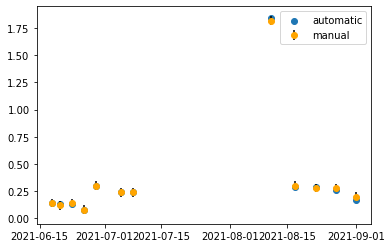

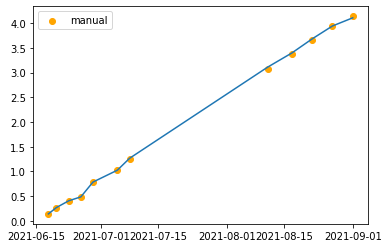

In [36]:
#1004 post proc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

path_manual_readings = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\1004_manual\\1004_manual.xlsx'
manual_readings = pd.read_excel(path_manual_readings)
final = pd.read_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1004_abl_sum.csv')

initial_date_str = manual_readings['initial_date'].tolist()
final_date_str = manual_readings['final_date'].tolist()
manual_disp = manual_readings['displacements [cm ice]'].tolist()

initial_date = []
final_date = []
periodic_sum = []
periodic_sum_mS = []
periodic_sum_fin = []

for idx, (init,fin) in enumerate(zip(initial_date_str, final_date_str)):
    temp_sum = 0
    temp_sum_mS = 0
    temp_sum_fin = 0
    print('init', init)
    y1 = int(init.split('.')[2])
    m1 = int(init.split('.')[1])
    d1 = int(init.split('.')[0])
    y2 = int(fin.split('.')[2])
    m2 = int(fin.split('.')[1])
    d2 = int(fin.split('.')[0])

    initial_date.append(pd.Timestamp(year=y1, month=m1, day=d1))
    final_date.append(pd.Timestamp(year=y2, month=m2, day=d2))

    interval = pd.Interval(pd.Timestamp(year=y1, month=m1, day=d1), pd.Timestamp(year=y2, month=m2, day=d2))

    for date_fin, disp_fin in zip(final['date'].tolist(), final['dh'].tolist()):
        date_fin = pd.Timestamp(year=int(date_fin.split('/')[2]), month=int(date_fin.split('/')[1]), day=int(date_fin.split('/')[0]))
        if date_fin in interval:
            temp_sum_fin += disp_fin
    periodic_sum_fin.append(temp_sum_fin)
    print(interval, temp_sum_fin)
print(periodic_sum)
print(manual_disp)
#plt.scatter(final_date, np.divide(periodic_sum, 100), label='automatic mT')
#plt.scatter(final_date, periodic_sum_mS, label='automatic mS')
plt.scatter(final_date, periodic_sum_fin, label='automatic')

#plt.scatter(final_date, manual_disp, label='manual')
plt.errorbar(final_date, np.divide(manual_disp,100), color='orange', yerr = 0.04, fmt='o', ecolor='black', label='manual')
plt.legend()
plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1004_weekly_comp.png')
plt.show()

plt.plot(final_date, np.cumsum(periodic_sum_fin))
#plt.plot(final['date'].tolist(), np.cumsum(final['dh'].tolist()))

plt.scatter(final_date, np.cumsum(np.divide(manual_disp,100)), color='orange', label='manual')
plt.legend()
plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1004_cumulative_comp.png')
plt.show()
#daily_displ.to_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_2_abl_sum.csv', index=False)  # , columns=column_names)


2021-06-06 05:19:00 2021-08-08 18:02:00
init 06.06.2021
(2021-06-06, 2021-06-11]
init 11.06.2021
(2021-06-11, 2021-06-14]
init 14.06.2021
(2021-06-14, 2021-06-15]
init 15.06.2021
(2021-06-15, 2021-06-19]
init 19.06.2021
(2021-06-19, 2021-06-21]
init 21.06.2021
(2021-06-21, 2021-06-24]
init 24.06.2021
(2021-06-24, 2021-06-29]
init 29.06.2021
(2021-06-29, 2021-07-05]
init 05.07.2021
(2021-07-05, 2021-07-10]
init 10.07.2021
(2021-07-10, 2021-07-12]
init 12.07.2021
(2021-07-12, 2021-07-17]
init 17.07.2021
(2021-07-17, 2021-07-20]
init 20.07.2021
(2021-07-20, 2021-07-23]
init 23.07.2021
(2021-07-23, 2021-07-26]
init 26.07.2021
(2021-07-26, 2021-07-30]
init 30.07.2021
(2021-07-30, 2021-08-03]
init 03.08.2021
(2021-08-03, 2021-08-08]
init 08.08.2021
(2021-08-08, 2021-08-09]
init 09.08.2021
(2021-08-09, 2021-09-13]
init 13.09.2021
(2021-09-13, 2021-09-17]
init 17.09.2021
(2021-09-17, 2021-09-19]
[18.717219, 16.532683000000002, 2.0943240000000003, 13.17864, 21.576128, 17.021722, 29.073231, 27.1

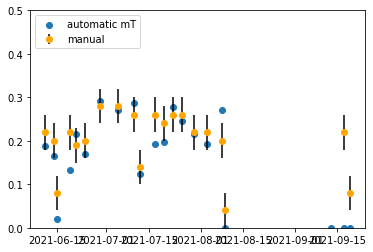

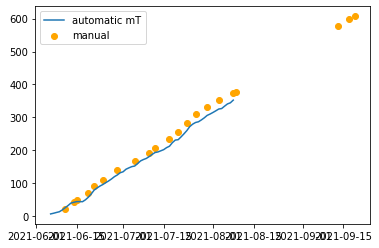

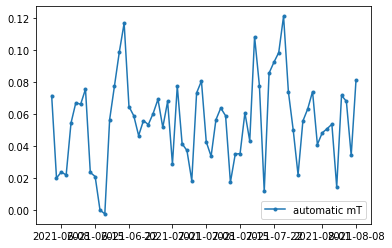

3.524392519999999
[ 22  42  50  72  91 111 139 167 193 207 233 257 283 309 331 353 373 377
 577 599 607]
[18.717219, 16.532683000000002, 2.0943240000000003, 13.17864, 21.576128, 17.021722, 29.073231, 27.128452999999997, 28.664123000000004, 12.279099, 19.167149, 19.801266, 27.664134999999998, 24.523308999999998, 21.504835, 19.372647999999998, 26.978189999999998, 0, 0, 0, 0]


In [39]:
#1005
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

path_automatic_readings = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\automatic_reading\\1005_mT_Hist_2021-06-06_05-19_2021-08-08_18-02.csv'
path_manual_readings = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\1005_manual\\1005_manual.xlsx'
#path_automatic_readings_mS = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\automatic_reading\\1006_mT_mS_dt2.xlsx'

auto_readings = pd.read_csv(path_automatic_readings)
manual_readings = pd.read_excel(path_manual_readings)
#auto_readings_mS = pd.read_excel(path_automatic_readings_mS)
#final = pd.read_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_abl_sum.csv')

#auto_readings_mS['rate'] = auto_readings_mS['rate'].rolling().mean()

start_year = int(path_automatic_readings.split('\\')[-1].split('_')[3].split('-')[0])
start_month = int(path_automatic_readings.split('\\')[-1].split('_')[3].split('-')[1])
start_day = int(path_automatic_readings.split('\\')[-1].split('_')[3].split('-')[2])
start_hour = int(path_automatic_readings.split('\\')[-1].split('_')[4].split('-')[0])
start_minute = int(path_automatic_readings.split('\\')[-1].split('_')[4].split('-')[1])

end_year = int(path_automatic_readings.split('\\')[-1].split('_')[5].split('-')[0])
end_month = int(path_automatic_readings.split('\\')[-1].split('_')[5].split('-')[1])
end_day = int(path_automatic_readings.split('\\')[-1].split('_')[5].split('-')[2])
end_hour = int(path_automatic_readings.split('\\')[-1].split('_')[6].split('-')[0])
end_minute = int(path_automatic_readings.split('\\')[-1].split('_')[6].split('-')[1].split('.')[0])


start_date = pd.Timestamp(year=start_year, month=start_month, day=start_day, hour=start_hour, minute=start_minute)
end_date = pd.Timestamp(year=end_year, month=end_month, day=end_day, hour=end_hour, minute=end_minute)

print(start_date, end_date)

initial_date_str = manual_readings['initial_date'].tolist()
final_date_str = manual_readings['final_date'].tolist()
manual_disp = manual_readings['displacements [cm ice]'].tolist()

# displacements mT_Hist
time_delta = auto_readings['time[h]'].tolist()
time = []
for t in time_delta:
    time.append(start_date + pd.Timedelta(hours=t))

auto_readings = pd.DataFrame({'date': time, 'dh': auto_readings['displacement rate [cm]'].tolist()}) #data=[[time,auto_readings['displacement rate [cm]'].tolist()]], columns=['time', 'displ'])

daily_displ = auto_readings.groupby(pd.Grouper(key='date', freq='1d')).sum().reset_index()

# displacements mT_mS
#time_delta_mS = auto_readings_mS['time'].tolist()
#time = []
#for t in time_delta_mS:
#    time.append(start_date + pd.Timedelta(hours=t))

#print(len(time), len(auto_readings_mS['rate'].tolist()))
#auto_readings_mS = pd.DataFrame({'date': time, 'dh': auto_readings_mS['rate'].tolist()}) #data=[[time,auto_readings['displacement rate [cm]'].tolist()]], columns=['time', 'displ'])

#daily_displ_mS = auto_readings_mS.groupby(pd.Grouper(key='date', freq='1d')).sum().reset_index()

initial_date = []
final_date = []
periodic_sum = []
periodic_sum_mS = []
periodic_sum_fin = []

for idx, (init,fin) in enumerate(zip(initial_date_str, final_date_str)):
    temp_sum = 0
    temp_sum_mS = 0
    temp_sum_fin = 0
    print('init', init)
    y1 = int(init.split('.')[2])
    m1 = int(init.split('.')[1])
    d1 = int(init.split('.')[0])
    y2 = int(fin.split('.')[2])
    m2 = int(fin.split('.')[1])
    d2 = int(fin.split('.')[0])

    initial_date.append(pd.Timestamp(year=y1, month=m1, day=d1))
    final_date.append(pd.Timestamp(year=y2, month=m2, day=d2))

    interval = pd.Interval(pd.Timestamp(year=y1, month=m1, day=d1), pd.Timestamp(year=y2, month=m2, day=d2))
    print(interval)

    #print(init, fin)
    for date, disp in zip(daily_displ['date'].tolist(), daily_displ['dh'].tolist()):
        if date in interval:
            temp_sum += disp
        #if init <= date < fin:
        #    temp_sum += disp
    periodic_sum.append(temp_sum)

    #for date_mS, disp_mS in zip(daily_displ_mS['date'].tolist(), daily_displ_mS['dh'].tolist()):
    #    if date_mS in interval:
    #        temp_sum_mS += disp_mS
    #periodic_sum_mS.append(temp_sum_mS)

    #for date_fin, disp_fin in zip(final['date'].tolist(), final['dh'].tolist()):
    #    date_fin = pd.Timestamp(date_fin)
    #    if date_fin in interval:
    #        temp_sum_fin += disp_fin
    #periodic_sum_fin.append(temp_sum_fin)

#mean_auto = np.divide((daily_displ['dh'].div(100) + daily_displ_mS['dh']), 2)

#print(daily_displ['dh'].iloc[1])

print(periodic_sum)
print(manual_disp)
plt.scatter(final_date, np.divide(periodic_sum, 100), label='automatic mT')
#plt.scatter(final_date, periodic_sum_mS, label='automatic mS')
#plt.scatter(final_date, periodic_sum_fin, label='automatic')

#plt.scatter(final_date, manual_disp, label='manual')
plt.errorbar(final_date, np.divide(manual_disp,100), color='orange', yerr = 0.04, fmt='o', ecolor='black', label='manual')
plt.legend()
plt.ylim([0,0.5])
plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1005_weekly_comp.png')
plt.show()


# plot cumulative displacements
plt.plot(daily_displ['date'].tolist(), np.cumsum(daily_displ['dh'].tolist()), label='automatic mT')
#plt.plot(daily_displ_mS['date'].tolist(), np.cumsum(daily_displ_mS['dh'].tolist()), label='automatic mS')
#plt.plot(daily_displ_mS['date'].tolist(), np.cumsum(mean_auto), label='automatic mean')

#plt.plot(initial_date, np.cumsum(periodic_sum))
plt.scatter(final_date, np.cumsum(manual_disp), color='orange', label='manual')
plt.legend()
plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1005_cumulative_comp.png')
plt.show()
daily_displ['dh'] = daily_displ['dh'].div(100)
daily_displ.to_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1005_abl_sum.csv', index=False)  # , columns=column_names)


plt.plot(daily_displ['date'].tolist(), daily_displ['dh'].tolist(), marker='.', label='automatic mT')
#plt.plot(daily_displ_mS['date'].tolist(), daily_displ_mS['dh'].tolist(), label='automatic mS')
#plt.plot(daily_displ['date'].tolist(), mean_auto, label='automatic mean')

#plt.plot(initial_date, np.cumsum(periodic_sum))
#plt.scatter(final_date, np.cumsum(manual_disp), color='orange', label='manual')
plt.legend()
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1005_cumulative_comp.png')
plt.show()

print(np.max(np.cumsum(daily_displ['dh'].tolist())))
print(np.cumsum(manual_disp))
print(periodic_sum)

init 06.06.2021
(2021-06-06, 2021-06-11] 0.18717219000000002
init 11.06.2021
(2021-06-11, 2021-06-14] 0.16532683
init 14.06.2021
(2021-06-14, 2021-06-15] 0.02094324
init 15.06.2021
(2021-06-15, 2021-06-19] 0.1317864
init 19.06.2021
(2021-06-19, 2021-06-21] 0.21576128
init 21.06.2021
(2021-06-21, 2021-06-24] 0.17021722
init 24.06.2021
(2021-06-24, 2021-06-29] 0.29073231
init 29.06.2021
(2021-06-29, 2021-07-05] 0.27128453
init 05.07.2021
(2021-07-05, 2021-07-10] 0.28664123
init 10.07.2021
(2021-07-10, 2021-07-12] 0.12279099
init 12.07.2021
(2021-07-12, 2021-07-17] 0.19167149
init 17.07.2021
(2021-07-17, 2021-07-20] 0.19801266
init 20.07.2021
(2021-07-20, 2021-07-23] 0.27664135
init 23.07.2021
(2021-07-23, 2021-07-26] 0.24523309
init 26.07.2021
(2021-07-26, 2021-07-30] 0.21504835
init 30.07.2021
(2021-07-30, 2021-08-03] 0.19372647999999998
init 03.08.2021
(2021-08-03, 2021-08-08] 0.2697819
init 08.08.2021
(2021-08-08, 2021-08-09] 0.04
init 09.08.2021
(2021-08-09, 2021-09-13] 2.0
init 13.0

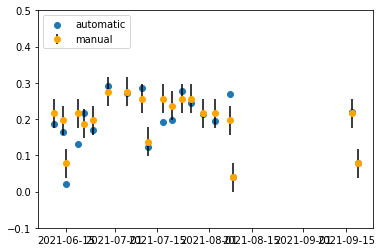

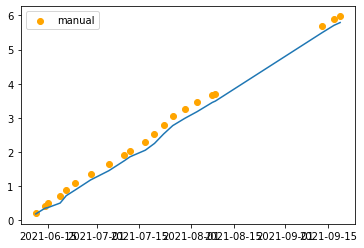

In [49]:
#1005 post proc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import math

path_manual_readings = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\1005_manual\\1005_manual.xlsx'
manual_readings = pd.read_excel(path_manual_readings)
final = pd.read_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1005_abl_sum.csv')

initial_date_str = manual_readings['initial_date'].tolist()
final_date_str = manual_readings['final_date'].tolist()
manual_disp = manual_readings['displacements [cm ice]'].tolist()

initial_date = []
final_date = []
periodic_sum = []
periodic_sum_mS = []
periodic_sum_fin = []

for idx, (init,fin) in enumerate(zip(initial_date_str, final_date_str)):
    temp_sum = 0
    temp_sum_mS = 0
    temp_sum_fin = 0
    print('init', init)
    y1 = int(init.split('.')[2])
    m1 = int(init.split('.')[1])
    d1 = int(init.split('.')[0])
    y2 = int(fin.split('.')[2])
    m2 = int(fin.split('.')[1])
    d2 = int(fin.split('.')[0])

    initial_date.append(pd.Timestamp(year=y1, month=m1, day=d1))
    final_date.append(pd.Timestamp(year=y2, month=m2, day=d2))

    interval = pd.Interval(pd.Timestamp(year=y1, month=m1, day=d1), pd.Timestamp(year=y2, month=m2, day=d2))

    for date_fin, disp_fin in zip(final['date'].tolist(), final['dh'].tolist()):
        date_fin = pd.Timestamp(year=int(date_fin.split('/')[2]), month=int(date_fin.split('/')[1]), day=int(date_fin.split('/')[0]))
        if date_fin in interval:
            temp_sum_fin += disp_fin
    periodic_sum_fin.append(temp_sum_fin)
    print(interval, temp_sum_fin)
print(periodic_sum)
print(manual_disp)
#plt.scatter(final_date, np.divide(periodic_sum, 100), label='automatic mT')
#plt.scatter(final_date, periodic_sum_mS, label='automatic mS')
plt.scatter(final_date, periodic_sum_fin, label='automatic')

#plt.scatter(final_date, manual_disp, label='manual')
plt.errorbar(final_date, np.divide(manual_disp,100)*np.cos(math.radians(10)), color='orange', yerr = 0.04, fmt='o', ecolor='black', label='manual')
plt.legend()
plt.ylim([-0.1, 0.5])
plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1005_weekly_comp.png')
plt.show()

plt.plot(final_date, np.cumsum(periodic_sum_fin))
plt.scatter(final_date, np.cumsum(np.divide(manual_disp,100)*np.cos(math.radians(10))), color='orange', label='manual')
plt.legend()
plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1005_cumulative_comp.png')
plt.show()
#daily_displ.to_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_2_abl_sum.csv', index=False)  # , columns=column_names)


2021-08-01 06:13:00 2021-09-29 09:08:00
init 29.06.2021
(2021-06-29, 2021-07-03]
init 03.07.2021
(2021-07-03, 2021-07-06]
init 06.07.2021
(2021-07-06, 2021-07-10]
init 10.07.2021
(2021-07-10, 2021-07-13]
init 13.07.2021
(2021-07-13, 2021-07-18]
init 18.07.2021
(2021-07-18, 2021-07-21]
init 21.07.2021
(2021-07-21, 2021-07-23]
init 23.07.2021
(2021-07-23, 2021-07-25]
init 25.07.2021
(2021-07-25, 2021-07-29]
init 29.07.2021
(2021-07-29, 2021-08-01]
init 01.08.2021
(2021-08-01, 2021-08-06]
init 06.08.2021
(2021-08-06, 2021-08-10]
init 10.08.2021
(2021-08-10, 2021-08-13]
init 13.08.2021
(2021-08-13, 2021-08-16]
init 16.08.2021
(2021-08-16, 2021-08-19]
init 19.08.2021
(2021-08-19, 2021-08-23]
init 23.08.2021
(2021-08-23, 2021-08-27]
init 27.08.2021
(2021-08-27, 2021-09-02]
init 02.09.2021
(2021-09-02, 2021-09-06]
init 06.09.2021
(2021-09-06, 2021-09-10]
init 10.09.2021
(2021-09-10, 2021-09-16]
init 16.09.2021
(2021-09-16, 2021-09-24]
init 24.09.2021
(2021-09-24, 2021-09-29]
[0, 0, 0, 0, 0, 0

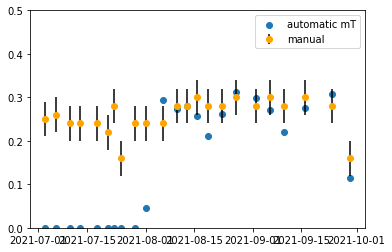

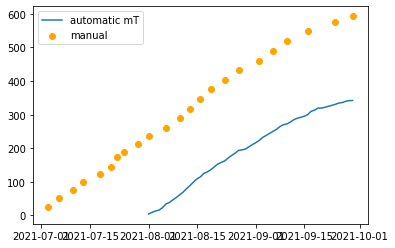

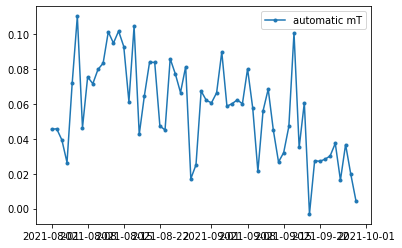

3.4228690399999993
[ 25  51  75  99 123 145 173 189 213 237 261 289 317 347 375 403 433 461
 491 519 549 577 593]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 4.555936, 29.418453, 27.379818, 28.007332999999996, 25.645055, 21.219403, 26.066971, 31.153679999999998, 29.928594000000004, 27.147444, 21.957071000000003, 27.580473, 30.70528, 11.521393000000002]


In [5]:
#1006
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

path_automatic_readings = 'C:\\Users\\Aaron\\Documents\\pubblications\\paper1_anomalies\\data\\holfuy\\2021\\automatic_reading\\1002\\1006_mT_Hist_2021-08-01_06-13_2021-09-29_09-08.csv'
path_manual_readings = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\1006_manual\\1006_manual.xlsx'
#path_automatic_readings_mS = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\automatic_reading\\1006_mT_mS_dt2.xlsx'

auto_readings = pd.read_csv(path_automatic_readings)
manual_readings = pd.read_excel(path_manual_readings)
#auto_readings_mS = pd.read_excel(path_automatic_readings_mS)
#final = pd.read_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_abl_sum.csv')

#auto_readings_mS['rate'] = auto_readings_mS['rate'].rolling().mean()

start_year = int(path_automatic_readings.split('\\')[-1].split('_')[3].split('-')[0])
start_month = int(path_automatic_readings.split('\\')[-1].split('_')[3].split('-')[1])
start_day = int(path_automatic_readings.split('\\')[-1].split('_')[3].split('-')[2])
start_hour = int(path_automatic_readings.split('\\')[-1].split('_')[4].split('-')[0])
start_minute = int(path_automatic_readings.split('\\')[-1].split('_')[4].split('-')[1])

end_year = int(path_automatic_readings.split('\\')[-1].split('_')[5].split('-')[0])
end_month = int(path_automatic_readings.split('\\')[-1].split('_')[5].split('-')[1])
end_day = int(path_automatic_readings.split('\\')[-1].split('_')[5].split('-')[2])
end_hour = int(path_automatic_readings.split('\\')[-1].split('_')[6].split('-')[0])
end_minute = int(path_automatic_readings.split('\\')[-1].split('_')[6].split('-')[1].split('.')[0])


start_date = pd.Timestamp(year=start_year, month=start_month, day=start_day, hour=start_hour, minute=start_minute)
end_date = pd.Timestamp(year=end_year, month=end_month, day=end_day, hour=end_hour, minute=end_minute)

print(start_date, end_date)

initial_date_str = manual_readings['initial_date'].tolist()
final_date_str = manual_readings['final_date'].tolist()
manual_disp = manual_readings['displacements [cm ice]'].tolist()

# displacements mT_Hist
time_delta = auto_readings['time[h]'].tolist()
time = []
for t in time_delta:
    time.append(start_date + pd.Timedelta(hours=t))

auto_readings = pd.DataFrame({'date': time, 'dh': auto_readings['displacement rate [cm]'].tolist()}) #data=[[time,auto_readings['displacement rate [cm]'].tolist()]], columns=['time', 'displ'])

daily_displ = auto_readings.groupby(pd.Grouper(key='date', freq='1d')).sum().reset_index()

# displacements mT_mS
#time_delta_mS = auto_readings_mS['time'].tolist()
#time = []
#for t in time_delta_mS:
#    time.append(start_date + pd.Timedelta(hours=t))

#print(len(time), len(auto_readings_mS['rate'].tolist()))
#auto_readings_mS = pd.DataFrame({'date': time, 'dh': auto_readings_mS['rate'].tolist()}) #data=[[time,auto_readings['displacement rate [cm]'].tolist()]], columns=['time', 'displ'])

#daily_displ_mS = auto_readings_mS.groupby(pd.Grouper(key='date', freq='1d')).sum().reset_index()

initial_date = []
final_date = []
periodic_sum = []
periodic_sum_mS = []
periodic_sum_fin = []

for idx, (init,fin) in enumerate(zip(initial_date_str, final_date_str)):
    temp_sum = 0
    temp_sum_mS = 0
    temp_sum_fin = 0
    print('init', init)
    y1 = int(init.split('.')[2])
    m1 = int(init.split('.')[1])
    d1 = int(init.split('.')[0])
    y2 = int(fin.split('.')[2])
    m2 = int(fin.split('.')[1])
    d2 = int(fin.split('.')[0])

    initial_date.append(pd.Timestamp(year=y1, month=m1, day=d1))
    final_date.append(pd.Timestamp(year=y2, month=m2, day=d2))

    interval = pd.Interval(pd.Timestamp(year=y1, month=m1, day=d1), pd.Timestamp(year=y2, month=m2, day=d2))
    print(interval)

    #print(init, fin)
    for date, disp in zip(daily_displ['date'].tolist(), daily_displ['dh'].tolist()):
        if date in interval:
            temp_sum += disp
        #if init <= date < fin:
        #    temp_sum += disp
    periodic_sum.append(temp_sum)

    #for date_mS, disp_mS in zip(daily_displ_mS['date'].tolist(), daily_displ_mS['dh'].tolist()):
    #    if date_mS in interval:
    #        temp_sum_mS += disp_mS
    #periodic_sum_mS.append(temp_sum_mS)

    #for date_fin, disp_fin in zip(final['date'].tolist(), final['dh'].tolist()):
    #    date_fin = pd.Timestamp(date_fin)
    #    if date_fin in interval:
    #        temp_sum_fin += disp_fin
    #periodic_sum_fin.append(temp_sum_fin)

#mean_auto = np.divide((daily_displ['dh'].div(100) + daily_displ_mS['dh']), 2)

#print(daily_displ['dh'].iloc[1])

print(periodic_sum)
print(manual_disp)
plt.scatter(final_date, np.divide(periodic_sum, 100), label='automatic mT')
#plt.scatter(final_date, periodic_sum_mS, label='automatic mS')
#plt.scatter(final_date, periodic_sum_fin, label='automatic')

#plt.scatter(final_date, manual_disp, label='manual')
plt.errorbar(final_date, np.divide(manual_disp,100), color='orange', yerr = 0.04, fmt='o', ecolor='black', label='manual')
plt.legend()
plt.ylim([0,0.5])
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1005_weekly_comp.png')
plt.show()


# plot cumulative displacements
plt.plot(daily_displ['date'].tolist(), np.cumsum(daily_displ['dh'].tolist()), label='automatic mT')
#plt.plot(daily_displ_mS['date'].tolist(), np.cumsum(daily_displ_mS['dh'].tolist()), label='automatic mS')
#plt.plot(daily_displ_mS['date'].tolist(), np.cumsum(mean_auto), label='automatic mean')

#plt.plot(initial_date, np.cumsum(periodic_sum))
plt.scatter(final_date, np.cumsum(manual_disp), color='orange', label='manual')
plt.legend()
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1005_cumulative_comp.png')
plt.show()
daily_displ['dh'] = daily_displ['dh'].div(100)
daily_displ.to_csv('C:\\Users\\Aaron\\Documents\\pubblications\\paper1_anomalies\\data\\holfuy\\2021\\automatic_reading\\1002\\1006_abl_sum2.csv', index=False)  # , columns=column_names)


plt.plot(daily_displ['date'].tolist(), daily_displ['dh'].tolist(), marker='.', label='automatic mT')
#plt.plot(daily_displ_mS['date'].tolist(), daily_displ_mS['dh'].tolist(), label='automatic mS')
#plt.plot(daily_displ['date'].tolist(), mean_auto, label='automatic mean')

#plt.plot(initial_date, np.cumsum(periodic_sum))
#plt.scatter(final_date, np.cumsum(manual_disp), color='orange', label='manual')
plt.legend()
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1005_cumulative_comp.png')
plt.show()

print(np.max(np.cumsum(daily_displ['dh'].tolist())))
print(np.cumsum(manual_disp))
print(periodic_sum)

init 29.06.2021
(2021-06-29, 2021-07-03] 0.28145177000000005
init 03.07.2021
(2021-07-03, 2021-07-06] 0.23981078
init 06.07.2021
(2021-07-06, 2021-07-10] 0.25191061000000003
init 10.07.2021
(2021-07-10, 2021-07-13] 0.19688841
init 13.07.2021
(2021-07-13, 2021-07-18] 0.27190031
init 18.07.2021
(2021-07-18, 2021-07-21] 0.31156767
init 21.07.2021
(2021-07-21, 2021-07-23] 0.20613064
init 23.07.2021
(2021-07-23, 2021-07-25] 0.16811084999999998
init 25.07.2021
(2021-07-25, 2021-07-29] 0.48
init 29.07.2021
(2021-07-29, 2021-08-01] 0.03366817
init 01.08.2021
(2021-08-01, 2021-08-06] 0.26729669
init 06.08.2021
(2021-08-06, 2021-08-10] 0.29631643
init 10.08.2021
(2021-08-10, 2021-08-13] 0.30096361
init 13.08.2021
(2021-08-13, 2021-08-16] 0.27091867000000003
init 16.08.2021
(2021-08-16, 2021-08-19] 0.3022686
init 19.08.2021
(2021-08-19, 2021-08-23] 0.28171871
init 23.08.2021
(2021-08-23, 2021-08-27] 0.34770409
init 27.08.2021
(2021-08-27, 2021-09-02] 0.31936481
init 02.09.2021
(2021-09-02, 2021-0

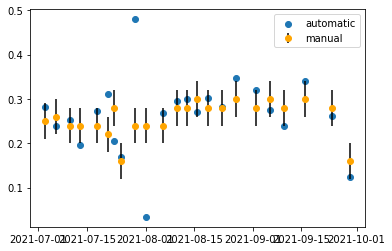

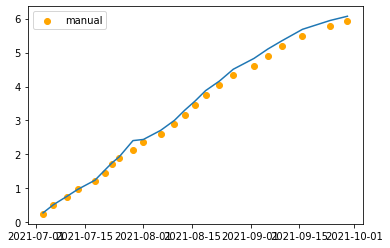

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

path_manual_readings = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\1006_manual\\1006_manual.xlsx'
manual_readings = pd.read_excel(path_manual_readings)
final = pd.read_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_abl_sum.csv')

initial_date_str = manual_readings['initial_date'].tolist()
final_date_str = manual_readings['final_date'].tolist()
manual_disp = manual_readings['displacements [cm ice]'].tolist()

initial_date = []
final_date = []
periodic_sum = []
periodic_sum_mS = []
periodic_sum_fin = []

for idx, (init,fin) in enumerate(zip(initial_date_str, final_date_str)):
    temp_sum = 0
    temp_sum_mS = 0
    temp_sum_fin = 0
    print('init', init)
    y1 = int(init.split('.')[2])
    m1 = int(init.split('.')[1])
    d1 = int(init.split('.')[0])
    y2 = int(fin.split('.')[2])
    m2 = int(fin.split('.')[1])
    d2 = int(fin.split('.')[0])

    initial_date.append(pd.Timestamp(year=y1, month=m1, day=d1))
    final_date.append(pd.Timestamp(year=y2, month=m2, day=d2))

    interval = pd.Interval(pd.Timestamp(year=y1, month=m1, day=d1), pd.Timestamp(year=y2, month=m2, day=d2))

    for date_fin, disp_fin in zip(final['date'].tolist(), final['dh'].tolist()):
        date_fin = pd.Timestamp(year=int(date_fin.split('/')[2]), month=int(date_fin.split('/')[1]), day=int(date_fin.split('/')[0]))
        if date_fin in interval:
            temp_sum_fin += disp_fin
    periodic_sum_fin.append(temp_sum_fin)
    print(interval, temp_sum_fin)
print(periodic_sum)
print(manual_disp)
#plt.scatter(final_date, np.divide(periodic_sum, 100), label='automatic mT')
#plt.scatter(final_date, periodic_sum_mS, label='automatic mS')
plt.scatter(final_date, periodic_sum_fin, label='automatic')

#plt.scatter(final_date, manual_disp, label='manual')
plt.errorbar(final_date, np.divide(manual_disp,100), color='orange', yerr = 0.04, fmt='o', ecolor='black', label='manual')
plt.legend()
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_weekly_comp.png')
plt.show()

plt.plot(final_date, np.cumsum(periodic_sum_fin))
plt.scatter(final_date, np.cumsum(np.divide(manual_disp,100)), color='orange', label='manual')
plt.legend()
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_cumulative_comp.png')
plt.show()
#daily_displ.to_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_2_abl_sum.csv', index=False)  # , columns=column_names)




2021-08-11 06:01:00 2021-09-29 13:08:00
init 18.06.2021
(2021-06-18, 2021-06-21]
init 21.06.2021
(2021-06-21, 2021-06-25]
init 25.06.2021
(2021-06-25, 2021-06-30]
init 30.06.2021
(2021-06-30, 2021-07-07]
init 07.07.2021
(2021-07-07, 2021-07-17]
init 17.07.2021
(2021-07-17, 2021-07-21]
init 21.07.2021
(2021-07-21, 2021-07-25]
init 25.07.2021
(2021-07-25, 2021-07-29]
init 29.07.2021
(2021-07-29, 2021-08-02]
init 02.08.2021
(2021-08-02, 2021-08-09]
init 09.08.2021
(2021-08-09, 2021-08-11]
init 11.08.2021
(2021-08-11, 2021-08-16]
init 16.08.2021
(2021-08-16, 2021-08-25]
init 25.08.2021
(2021-08-25, 2021-09-05]
init 05.09.2021
(2021-09-05, 2021-09-16]
init 16.09.2021
(2021-09-16, 2021-09-29]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6.2062990000000005, 32.35921, 33.856894000000004, 40.09588199999999, 36.68893, 31.749356000000006]
[26, 26, 26, 26, 22, 24, 26, 20, 16, 26, 12, 36, 41, 42, 40, 40]


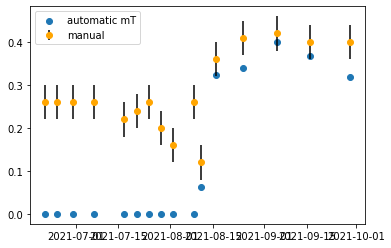

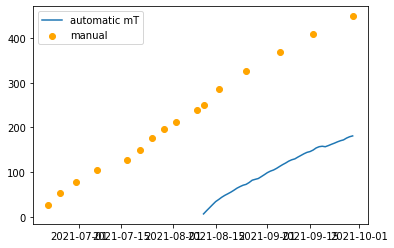

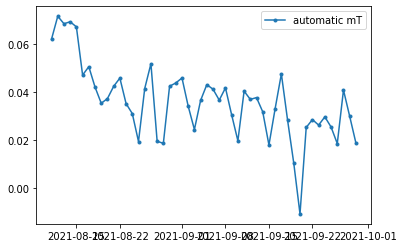

1.8095657100000004
[ 26  52  78 104 126 150 176 196 212 238 250 286 327 369 409 449]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6.2062990000000005, 32.35921, 33.856894000000004, 40.09588199999999, 36.68893, 31.749356000000006]


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

path_automatic_readings = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\automatic_reading\\1007_mT_Hist_2021-08-11_06-01_2021-09-29_13-08.csv'
path_manual_readings = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\1007_manual\\1007_manual.xlsx'
#path_automatic_readings_mS = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\automatic_reading\\1006_mT_mS_dt2.xlsx'

auto_readings = pd.read_csv(path_automatic_readings)
manual_readings = pd.read_excel(path_manual_readings)
#auto_readings_mS = pd.read_excel(path_automatic_readings_mS)
#final = pd.read_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_abl_sum.csv')

#auto_readings_mS['rate'] = auto_readings_mS['rate'].rolling().mean()

start_year = int(path_automatic_readings.split('\\')[-1].split('_')[3].split('-')[0])
start_month = int(path_automatic_readings.split('\\')[-1].split('_')[3].split('-')[1])
start_day = int(path_automatic_readings.split('\\')[-1].split('_')[3].split('-')[2])
start_hour = int(path_automatic_readings.split('\\')[-1].split('_')[4].split('-')[0])
start_minute = int(path_automatic_readings.split('\\')[-1].split('_')[4].split('-')[1])

end_year = int(path_automatic_readings.split('\\')[-1].split('_')[5].split('-')[0])
end_month = int(path_automatic_readings.split('\\')[-1].split('_')[5].split('-')[1])
end_day = int(path_automatic_readings.split('\\')[-1].split('_')[5].split('-')[2])
end_hour = int(path_automatic_readings.split('\\')[-1].split('_')[6].split('-')[0])
end_minute = int(path_automatic_readings.split('\\')[-1].split('_')[6].split('-')[1].split('.')[0])


start_date = pd.Timestamp(year=start_year, month=start_month, day=start_day, hour=start_hour, minute=start_minute)
end_date = pd.Timestamp(year=end_year, month=end_month, day=end_day, hour=end_hour, minute=end_minute)

print(start_date, end_date)

initial_date_str = manual_readings['initial_date'].tolist()
final_date_str = manual_readings['final_date'].tolist()
manual_disp = manual_readings['displacements [cm ice]'].tolist()

# displacements mT_Hist
time_delta = auto_readings['time[h]'].tolist()
time = []
for t in time_delta:
    time.append(start_date + pd.Timedelta(hours=t))

auto_readings = pd.DataFrame({'date': time, 'dh': auto_readings['displacement rate [cm]'].tolist()}) #data=[[time,auto_readings['displacement rate [cm]'].tolist()]], columns=['time', 'displ'])

daily_displ = auto_readings.groupby(pd.Grouper(key='date', freq='1d')).sum().reset_index()

# displacements mT_mS
#time_delta_mS = auto_readings_mS['time'].tolist()
#time = []
#for t in time_delta_mS:
#    time.append(start_date + pd.Timedelta(hours=t))

#print(len(time), len(auto_readings_mS['rate'].tolist()))
#auto_readings_mS = pd.DataFrame({'date': time, 'dh': auto_readings_mS['rate'].tolist()}) #data=[[time,auto_readings['displacement rate [cm]'].tolist()]], columns=['time', 'displ'])

#daily_displ_mS = auto_readings_mS.groupby(pd.Grouper(key='date', freq='1d')).sum().reset_index()

initial_date = []
final_date = []
periodic_sum = []
periodic_sum_mS = []
periodic_sum_fin = []

for idx, (init,fin) in enumerate(zip(initial_date_str, final_date_str)):
    temp_sum = 0
    temp_sum_mS = 0
    temp_sum_fin = 0
    print('init', init)
    y1 = int(init.split('.')[2])
    m1 = int(init.split('.')[1])
    d1 = int(init.split('.')[0])
    y2 = int(fin.split('.')[2])
    m2 = int(fin.split('.')[1])
    d2 = int(fin.split('.')[0])

    initial_date.append(pd.Timestamp(year=y1, month=m1, day=d1))
    final_date.append(pd.Timestamp(year=y2, month=m2, day=d2))

    interval = pd.Interval(pd.Timestamp(year=y1, month=m1, day=d1), pd.Timestamp(year=y2, month=m2, day=d2))
    print(interval)

    #print(init, fin)
    for date, disp in zip(daily_displ['date'].tolist(), daily_displ['dh'].tolist()):
        if date in interval:
            temp_sum += disp
        #if init <= date < fin:
        #    temp_sum += disp
    periodic_sum.append(temp_sum)

    #for date_mS, disp_mS in zip(daily_displ_mS['date'].tolist(), daily_displ_mS['dh'].tolist()):
    #    if date_mS in interval:
    #        temp_sum_mS += disp_mS
    #periodic_sum_mS.append(temp_sum_mS)

    #for date_fin, disp_fin in zip(final['date'].tolist(), final['dh'].tolist()):
    #    date_fin = pd.Timestamp(date_fin)
    #    if date_fin in interval:
    #        temp_sum_fin += disp_fin
    #periodic_sum_fin.append(temp_sum_fin)

#mean_auto = np.divide((daily_displ['dh'].div(100) + daily_displ_mS['dh']), 2)

#print(daily_displ['dh'].iloc[1])

print(periodic_sum)
print(manual_disp)
plt.scatter(final_date, np.divide(periodic_sum, 100), label='automatic mT')
#plt.scatter(final_date, periodic_sum_mS, label='automatic mS')
#plt.scatter(final_date, periodic_sum_fin, label='automatic')

#plt.scatter(final_date, manual_disp, label='manual')
plt.errorbar(final_date, np.divide(manual_disp,100), color='orange', yerr = 0.04, fmt='o', ecolor='black', label='manual')
plt.legend()
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_2_weekly_comp.png')
plt.show()


# plot cumulative displacements
plt.plot(daily_displ['date'].tolist(), np.cumsum(daily_displ['dh'].tolist()), label='automatic mT')
#plt.plot(daily_displ_mS['date'].tolist(), np.cumsum(daily_displ_mS['dh'].tolist()), label='automatic mS')
#plt.plot(daily_displ_mS['date'].tolist(), np.cumsum(mean_auto), label='automatic mean')

#plt.plot(initial_date, np.cumsum(periodic_sum))
plt.scatter(final_date, np.cumsum(manual_disp), color='orange', label='manual')
plt.legend()
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_2_cumulative_comp.png')
plt.show()
daily_displ['dh'] = daily_displ['dh'].div(100)
#daily_displ.to_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1007_2_abl_sum.csv', index=False)  # , columns=column_names)


plt.plot(daily_displ['date'].tolist(), daily_displ['dh'].tolist(), marker='.', label='automatic mT')
#plt.plot(daily_displ_mS['date'].tolist(), daily_displ_mS['dh'].tolist(), label='automatic mS')
#plt.plot(daily_displ['date'].tolist(), mean_auto, label='automatic mean')

#plt.plot(initial_date, np.cumsum(periodic_sum))
#plt.scatter(final_date, np.cumsum(manual_disp), color='orange', label='manual')
plt.legend()
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_cumulative_comp.png')
plt.show()

print(np.max(np.cumsum(daily_displ['dh'].tolist())))
print(np.cumsum(manual_disp))
print(periodic_sum)



In [50]:
#1007 post proc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

path_manual_readings = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\1007_manual\\1007_manual.xlsx'
manual_readings = pd.read_excel(path_manual_readings)
final = pd.read_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1007_abl_sum.csv')

initial_date_str = manual_readings['initial_date'].tolist()
final_date_str = manual_readings['final_date'].tolist()
manual_disp = manual_readings['displacements [cm ice]'].tolist()

initial_date = []
final_date = []
periodic_sum = []
periodic_sum_mS = []
periodic_sum_fin = []

for idx, (init,fin) in enumerate(zip(initial_date_str, final_date_str)):
    temp_sum = 0
    temp_sum_mS = 0
    temp_sum_fin = 0
    print('init', init)
    y1 = int(init.split('.')[2])
    m1 = int(init.split('.')[1])
    d1 = int(init.split('.')[0])
    y2 = int(fin.split('.')[2])
    m2 = int(fin.split('.')[1])
    d2 = int(fin.split('.')[0])

    initial_date.append(pd.Timestamp(year=y1, month=m1, day=d1))
    final_date.append(pd.Timestamp(year=y2, month=m2, day=d2))

    interval = pd.Interval(pd.Timestamp(year=y1, month=m1, day=d1), pd.Timestamp(year=y2, month=m2, day=d2))

    for date_fin, disp_fin in zip(final['date'].tolist(), final['dh'].tolist()):
        date_fin = pd.Timestamp(year=int(date_fin.split('/')[2]), month=int(date_fin.split('/')[1]), day=int(date_fin.split('/')[0]))
        if date_fin in interval:
            temp_sum_fin += disp_fin
    periodic_sum_fin.append(temp_sum_fin)
    print(interval, temp_sum_fin)
print(periodic_sum)
print(manual_disp)
#plt.scatter(final_date, np.divide(periodic_sum, 100), label='automatic mT')
#plt.scatter(final_date, periodic_sum_mS, label='automatic mS')
plt.scatter(final_date, periodic_sum_fin, label='automatic')

#plt.scatter(final_date, manual_disp, label='manual')
plt.errorbar(final_date, np.divide(manual_disp,100), color='orange', yerr = 0.04, fmt='o', ecolor='black', label='manual')
plt.legend()
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1007_weekly_comp.png')
plt.show()

plt.plot(final_date, np.cumsum(periodic_sum_fin))
plt.scatter(final_date, np.cumsum(np.divide(manual_disp,100)), color='orange', label='manual')
plt.legend()
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1007_cumulative_comp.png')
plt.show()
#daily_displ.to_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_2_abl_sum.csv', index=False)  # , columns=column_names)


init 18.06.2021


AttributeError: 'float' object has no attribute 'split'

2021-07-07 06:14:00 2021-08-18 17:38:00
init 04.06.2021
(2021-06-04, 2021-06-12]
init 12.06.2021
(2021-06-12, 2021-06-13]
init 13.06.2021
(2021-06-13, 2021-06-19]
init 19.06.2021
(2021-06-19, 2021-07-07]
init 07.07.2021
(2021-07-07, 2021-07-13]
init 13.07.2021
(2021-07-13, 2021-07-20]
init 20.07.2021
(2021-07-20, 2021-07-24]
init 24.07.2021
(2021-07-24, 2021-07-28]
init 28.07.2021
(2021-07-28, 2021-07-31]
init 31.07.2021
(2021-07-31, 2021-08-08]
init 08.08.2021
(2021-08-08, 2021-08-13]
init 13.08.2021
(2021-08-13, 2021-08-17]
init 17.08.2021
(2021-08-17, 2021-08-22]
init 22.08.2021
(2021-08-22, 2021-08-26]
init 26.08.2021
(2021-08-26, 2021-09-02]
init 02.09.2021
(2021-09-02, 2021-09-09]
init 09.09.2021
(2021-09-09, 2021-09-16]
init 16.09.2021
(2021-09-16, 2021-09-22]
[0, 0, 0, 4.948032, 32.12191, 36.585665, 27.557826999999996, 23.664082, 20.072157, 37.536246, 41.625188, 34.210493, 2.318194, 0, 0, 0, 0, 0]
[38, 6, 0, 120, 32, 34, 34, 18, 0, 35, 35, 35, 29, 27, 34, 30, 30, 12]


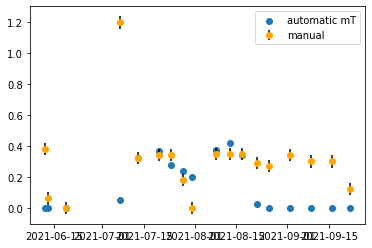

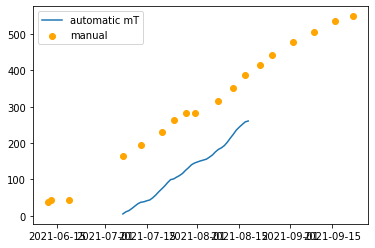

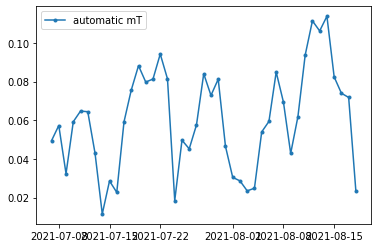

2.60639794
[ 38  44  44 164 196 230 264 282 282 317 352 387 416 443 477 507 537 549]
[0, 0, 0, 4.948032, 32.12191, 36.585665, 27.557826999999996, 23.664082, 20.072157, 37.536246, 41.625188, 34.210493, 2.318194, 0, 0, 0, 0, 0]


In [21]:
# 1008
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import datetime as dt

path_automatic_readings = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\automatic_reading\\1008_mT_Hist_2021-07-07_06-14_2021-08-18_17-38.csv'
path_manual_readings = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\1008_manual\\1008_manual.xlsx'
#path_automatic_readings_mS = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\automatic_reading\\1006_mT_mS_dt2.xlsx'

auto_readings = pd.read_csv(path_automatic_readings)
manual_readings = pd.read_excel(path_manual_readings)
#auto_readings_mS = pd.read_excel(path_automatic_readings_mS)
#final = pd.read_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_abl_sum.csv')

#auto_readings_mS['rate'] = auto_readings_mS['rate'].rolling().mean()

start_year = int(path_automatic_readings.split('\\')[-1].split('_')[3].split('-')[0])
start_month = int(path_automatic_readings.split('\\')[-1].split('_')[3].split('-')[1])
start_day = int(path_automatic_readings.split('\\')[-1].split('_')[3].split('-')[2])
start_hour = int(path_automatic_readings.split('\\')[-1].split('_')[4].split('-')[0])
start_minute = int(path_automatic_readings.split('\\')[-1].split('_')[4].split('-')[1])

end_year = int(path_automatic_readings.split('\\')[-1].split('_')[5].split('-')[0])
end_month = int(path_automatic_readings.split('\\')[-1].split('_')[5].split('-')[1])
end_day = int(path_automatic_readings.split('\\')[-1].split('_')[5].split('-')[2])
end_hour = int(path_automatic_readings.split('\\')[-1].split('_')[6].split('-')[0])
end_minute = int(path_automatic_readings.split('\\')[-1].split('_')[6].split('-')[1].split('.')[0])


start_date = pd.Timestamp(year=start_year, month=start_month, day=start_day, hour=start_hour, minute=start_minute)
end_date = pd.Timestamp(year=end_year, month=end_month, day=end_day, hour=end_hour, minute=end_minute)

print(start_date, end_date)

initial_date_str = manual_readings['initial_date'].tolist()
final_date_str = manual_readings['final_date'].tolist()
manual_disp = manual_readings['displacements [cm ice]'].tolist()

# displacements mT_Hist
time_delta = auto_readings['time[h]'].tolist()
time = []
for t in time_delta:
    time.append(start_date + pd.Timedelta(hours=t))

auto_readings = pd.DataFrame({'date': time, 'dh': auto_readings['displacement rate [cm]'].tolist()}) #data=[[time,auto_readings['displacement rate [cm]'].tolist()]], columns=['time', 'displ'])

daily_displ = auto_readings.groupby(pd.Grouper(key='date', freq='1d')).sum().reset_index()

# displacements mT_mS
#time_delta_mS = auto_readings_mS['time'].tolist()
#time = []
#for t in time_delta_mS:
#    time.append(start_date + pd.Timedelta(hours=t))

#print(len(time), len(auto_readings_mS['rate'].tolist()))
#auto_readings_mS = pd.DataFrame({'date': time, 'dh': auto_readings_mS['rate'].tolist()}) #data=[[time,auto_readings['displacement rate [cm]'].tolist()]], columns=['time', 'displ'])

#daily_displ_mS = auto_readings_mS.groupby(pd.Grouper(key='date', freq='1d')).sum().reset_index()

initial_date = []
final_date = []
periodic_sum = []
periodic_sum_mS = []
periodic_sum_fin = []

for idx, (init,fin) in enumerate(zip(initial_date_str, final_date_str)):
    temp_sum = 0
    temp_sum_mS = 0
    temp_sum_fin = 0
    print('init', init)
    y1 = int(init.split('.')[2])
    m1 = int(init.split('.')[1])
    d1 = int(init.split('.')[0])
    y2 = int(fin.split('.')[2])
    m2 = int(fin.split('.')[1])
    d2 = int(fin.split('.')[0])

    initial_date.append(pd.Timestamp(year=y1, month=m1, day=d1))
    final_date.append(pd.Timestamp(year=y2, month=m2, day=d2))

    interval = pd.Interval(pd.Timestamp(year=y1, month=m1, day=d1), pd.Timestamp(year=y2, month=m2, day=d2))
    print(interval)

    #print(init, fin)
    for date, disp in zip(daily_displ['date'].tolist(), daily_displ['dh'].tolist()):
        if date in interval:
            temp_sum += disp
        #if init <= date < fin:
        #    temp_sum += disp
    periodic_sum.append(temp_sum)

    #for date_mS, disp_mS in zip(daily_displ_mS['date'].tolist(), daily_displ_mS['dh'].tolist()):
    #    if date_mS in interval:
    #        temp_sum_mS += disp_mS
    #periodic_sum_mS.append(temp_sum_mS)

    #for date_fin, disp_fin in zip(final['date'].tolist(), final['dh'].tolist()):
    #    date_fin = pd.Timestamp(date_fin)
    #    if date_fin in interval:
    #        temp_sum_fin += disp_fin
    #periodic_sum_fin.append(temp_sum_fin)

#mean_auto = np.divide((daily_displ['dh'].div(100) + daily_displ_mS['dh']), 2)

#print(daily_displ['dh'].iloc[1])

print(periodic_sum)
print(manual_disp)
plt.scatter(final_date, np.divide(periodic_sum, 100), label='automatic mT')
#plt.scatter(final_date, periodic_sum_mS, label='automatic mS')
#plt.scatter(final_date, periodic_sum_fin, label='automatic')

#plt.scatter(final_date, manual_disp, label='manual')
plt.errorbar(final_date, np.divide(manual_disp,100), color='orange', yerr = 0.04, fmt='o', ecolor='black', label='manual')
plt.legend()
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_2_weekly_comp.png')
plt.show()


# plot cumulative displacements
plt.plot(daily_displ['date'].tolist(), np.cumsum(daily_displ['dh'].tolist()), label='automatic mT')
#plt.plot(daily_displ_mS['date'].tolist(), np.cumsum(daily_displ_mS['dh'].tolist()), label='automatic mS')
#plt.plot(daily_displ_mS['date'].tolist(), np.cumsum(mean_auto), label='automatic mean')

#plt.plot(initial_date, np.cumsum(periodic_sum))
plt.scatter(final_date, np.cumsum(manual_disp), color='orange', label='manual')
plt.legend()
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_2_cumulative_comp.png')
plt.show()
daily_displ['dh'] = daily_displ['dh'].div(100)
#daily_displ.to_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1008_2_abl_sum.csv', index=False)  # , columns=column_names)


plt.plot(daily_displ['date'].tolist(), daily_displ['dh'].tolist(), marker='.', label='automatic mT')
#plt.plot(daily_displ_mS['date'].tolist(), daily_displ_mS['dh'].tolist(), label='automatic mS')
#plt.plot(daily_displ['date'].tolist(), mean_auto, label='automatic mean')

#plt.plot(initial_date, np.cumsum(periodic_sum))
#plt.scatter(final_date, np.cumsum(manual_disp), color='orange', label='manual')
plt.legend()
#plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_cumulative_comp.png')
plt.show()

print(np.max(np.cumsum(daily_displ['dh'].tolist())))
print(np.cumsum(manual_disp))
print(periodic_sum)

init 04.06.2021
(2021-06-04, 2021-06-12] 0.34505346
init 12.06.2021
(2021-06-12, 2021-06-13] 0.0
init 13.06.2021
(2021-06-13, 2021-06-19] 0.0062891
init 19.06.2021
(2021-06-19, 2021-07-07] 1.24948032
init 07.07.2021
(2021-07-07, 2021-07-13] 0.3212191
init 13.07.2021
(2021-07-13, 2021-07-20] 0.36585665
init 20.07.2021
(2021-07-20, 2021-07-24] 0.27557827
init 24.07.2021
(2021-07-24, 2021-07-28] 0.15256518000000002
init 28.07.2021
(2021-07-28, 2021-07-31] 0.0
init 31.07.2021
(2021-07-31, 2021-08-08] 0.37536245999999995
init 08.08.2021
(2021-08-08, 2021-08-13] 0.41625187999999996
init 13.08.2021
(2021-08-13, 2021-08-17] 0.34210493000000003
init 17.08.2021
(2021-08-17, 2021-08-22] 0.31318194
init 22.08.2021
(2021-08-22, 2021-08-26] 0.27
init 26.08.2021
(2021-08-26, 2021-09-02] 0.34
init 02.09.2021
(2021-09-02, 2021-09-09] 0.3
init 09.09.2021
(2021-09-09, 2021-09-16] 0.3
init 16.09.2021
(2021-09-16, 2021-09-22] 0.12
[]
[38, 6, 0, 120, 32, 34, 34, 18, 0, 35, 35, 35, 29, 27, 34, 30, 30, 12]


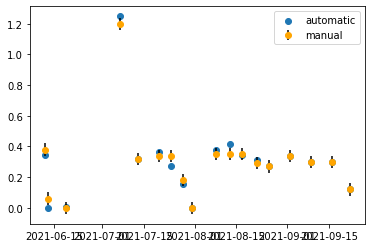

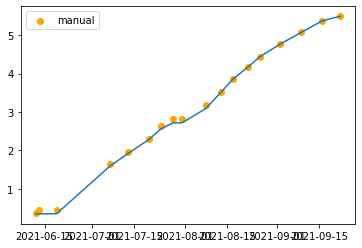

In [25]:
#1008 post proc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

path_manual_readings = 'C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\1008_manual\\1008_manual.xlsx'
manual_readings = pd.read_excel(path_manual_readings)
final = pd.read_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1008_abl_sum.csv')

initial_date_str = manual_readings['initial_date'].tolist()
final_date_str = manual_readings['final_date'].tolist()
manual_disp = manual_readings['displacements [cm ice]'].tolist()

initial_date = []
final_date = []
periodic_sum = []
periodic_sum_mS = []
periodic_sum_fin = []

for idx, (init,fin) in enumerate(zip(initial_date_str, final_date_str)):
    temp_sum = 0
    temp_sum_mS = 0
    temp_sum_fin = 0
    print('init', init)
    y1 = int(init.split('.')[2])
    m1 = int(init.split('.')[1])
    d1 = int(init.split('.')[0])
    y2 = int(fin.split('.')[2])
    m2 = int(fin.split('.')[1])
    d2 = int(fin.split('.')[0])

    initial_date.append(pd.Timestamp(year=y1, month=m1, day=d1))
    final_date.append(pd.Timestamp(year=y2, month=m2, day=d2))

    interval = pd.Interval(pd.Timestamp(year=y1, month=m1, day=d1), pd.Timestamp(year=y2, month=m2, day=d2))

    for date_fin, disp_fin in zip(final['date'].tolist(), final['dh'].tolist()):
        date_fin = pd.Timestamp(year=int(date_fin.split('/')[2]), month=int(date_fin.split('/')[1]), day=int(date_fin.split('/')[0]))
        if date_fin in interval:
            temp_sum_fin += disp_fin
    periodic_sum_fin.append(temp_sum_fin)
    print(interval, temp_sum_fin)
print(periodic_sum)
print(manual_disp)
#plt.scatter(final_date, np.divide(periodic_sum, 100), label='automatic mT')
#plt.scatter(final_date, periodic_sum_mS, label='automatic mS')
plt.scatter(final_date, periodic_sum_fin, label='automatic')

#plt.scatter(final_date, manual_disp, label='manual')
plt.errorbar(final_date, np.divide(manual_disp,100), color='orange', yerr = 0.04, fmt='o', ecolor='black', label='manual')
plt.legend()
plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1008_weekly_comp.png')
plt.show()

plt.plot(final_date, np.cumsum(periodic_sum_fin))
plt.scatter(final_date, np.cumsum(np.divide(manual_disp,100)), color='orange', label='manual')
plt.legend()
plt.savefig('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1008_cumulative_comp.png')
plt.show()
#daily_displ.to_csv('C:\\Users\\Aaron\\Documents\\Holfuy\\2021\\final_readings\\1006_2_abl_sum.csv', index=False)  # , columns=column_names)
